#### Written by Gabriel Borges Pinheiro
[Github](github.com/gabrielbopi)

Simulation made like as the figure 1.9 at [DOI: 10.1561/2000000093](https://massivemimobook.com/wp/free-pdf/).

In [3]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def db(X):
    return 10 * np.log10(X)

In [5]:
def inv_db(x):
    return 10**(x/10)

In [6]:
n_sample = 100
precision_base = 1.045
min_ = -10; max_ = 30
SNRmin = inv_db(min_)
SNRmax = inv_db(max_); 

In [14]:
beta_db = np.array([-30, -10])
beta = inv_db(beta_db)
SNR0_db = np.linspace(min_, max_, num=n_sample)
SNR0 = inv_db(SNR0_db)

SNR0_inv = 1/SNR0

<ipython-input-18-edd45eeeefaa>:10: RuntimeWarning: overflow encountered in exp
  SE0NLoS = (np.exp(SNR0_inv)*sc.expn(1, SNR0_inv) - np.exp(SNR0_invb)*sc.expn(1, SNR0_invb))/(np.log(2)*(1-b))
<ipython-input-18-edd45eeeefaa>:10: RuntimeWarning: invalid value encountered in multiply
  SE0NLoS = (np.exp(SNR0_inv)*sc.expn(1, SNR0_inv) - np.exp(SNR0_invb)*sc.expn(1, SNR0_invb))/(np.log(2)*(1-b))


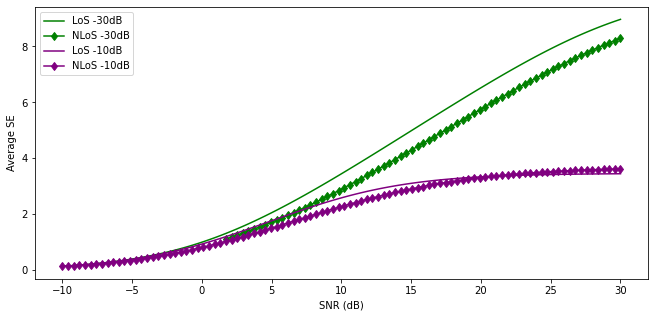

In [18]:
color = ['green','purple']
i = 0
plt.subplots(figsize = (11,5))
for b in beta:#beta = {-30db,-10db}
    SNR0_invb = SNR0_inv/b
    #SE0LoS:
    SE0LoS = np.log2(1+1/(b+SNR0_inv))

    #SE0NLoS:
    SE0NLoS = (np.exp(SNR0_inv)*sc.expn(1, SNR0_inv) - np.exp(SNR0_invb)*sc.expn(1, SNR0_invb))/(np.log(2)*(1-b))

    #Plot
    plt.xlabel('SNR (dB)')
    label = 'LoS {}dB'.format(beta_db[i])
    plt.plot(SNR0_db, SE0LoS, label = label, color = color[i])
    label = 'NLoS {}dB'.format(beta_db[i])
    plt.plot(SNR0_db,SE0NLoS, label = label, color = color[i], marker = 'd')
    plt.ylabel('Average SE')
    i += 1
plt.legend()